In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error as mae
import warnings
warnings.filterwarnings('ignore')

In [81]:
# Importing data
# df - the main data frame that I'm working on
# dfo2 - not important at the moment. Can't tell if I'll use it
df = pd.read_csv('heart.csv')
dfo2 = pd.read_csv('o2Saturation.csv')

In [123]:
def model_quality(i, x_t, y_t, x_v, y_v):
    model = LogisticRegression(random_state=1, max_iter=i)
    model.fit(x_t, y_t)
    pred = model.predict(x_v)
    return mae(y_v, pred)

def group_by_age(series):
    return pd.cut(x=series, bins=[20, 30, 40, 50, 60, 70, 80],
                       labels=[20, 30, 40, 50, 60, 70])

In [125]:
# Getting to know your data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5, 1.0, 'Cases of people with a heart disease')

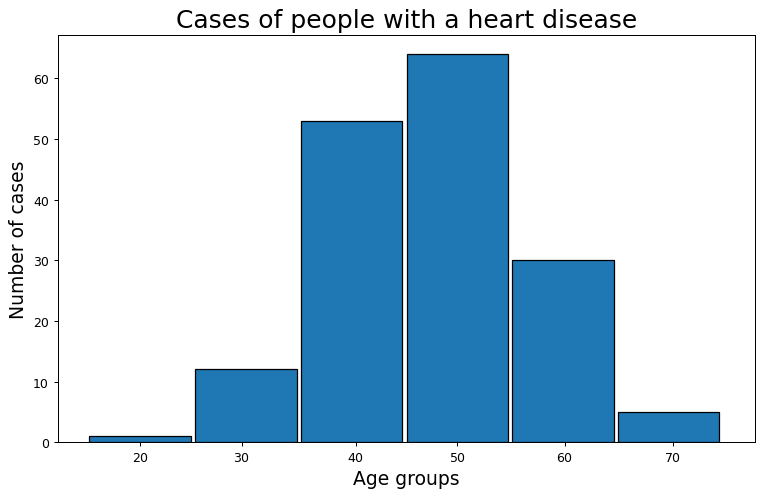

In [269]:
# Showing a rate of heart diseases based on age
# As you can see people that are 50 years old have the highest occurences of a heart disease
# Notice that I'm usinge a function for categorizing by age
people_with_heart_disease = df[df['output'] == 1]

plt.figure(figsize=(10, 6), dpi=90)
categorized_by_age = group_by_age(people_with_heart_disease['age'])
categorized_by_age.hist(align='mid', bins=6, edgecolor='black', width=8)
plt.xticks([24, 32, 41, 49, 57.5, 66],
          [r'$20$', r'$30$', r'$40$', r'$50$', r'$60$', r'$70$'])
plt.grid(False)
plt.ylabel('Number of cases', fontsize='15')
plt.xlabel('Age groups', fontsize='15')
plt.title('Cases of people with a heart disease', fontsize='20')

([<matplotlib.axis.XTick at 0x245e2a6f6d0>,
 [Text(34.5, 0, '$30$'),
  Text(42.5, 0, '$40$'),
  Text(50.0, 0, '$50$'),
  Text(58.0, 0, '$60$'),
  Text(66.0, 0, '$70$')])

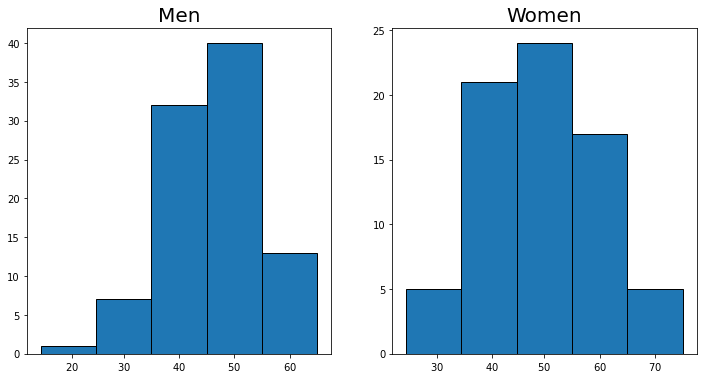

In [268]:
men_with_heart_disease = people_with_heart_disease[people_with_heart_disease['sex'] == 1]
women_with_heart_disease = people_with_heart_disease[people_with_heart_disease['sex'] == 0]

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(group_by_age(men_with_heart_disease['age']), bins=5, edgecolor='black')
plt.title('Men', fontsize='20')
plt.xticks([24.5, 32, 40, 48, 56],
          [r'$20$', r'$30$', r'$40$', r'$50$', r'$60$',])

plt.subplot(1,2,2)
plt.hist(group_by_age(women_with_heart_disease['age']), bins=5, edgecolor='black')
plt.title('Women', fontsize='20')
plt.xticks([34.5, 42.5, 50, 58, 66],
          [r'$30$', r'$40$', r'$50$', r'$60$', r'$70$',])

In [249]:
group_by_age(women_with_heart_disease['age']).unique()

[40, 50, 60, 70, 30]
Categories (5, int64): [30 < 40 < 50 < 60 < 70]

In [57]:
y = df['output']
features = ['age', 'sex', 'cp', 'trtbps', 'fbs', 'chol']
X = df[features]

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

In [10]:
model_logistic_regression = LogisticRegression(random_state=1, max_iter=75)
model_logistic_regression.fit(X_train, y_train)
pred_logistic_regression = model_logistic_regression.predict(X_val)

In [11]:
model_logistic_regression.score(X_val, y_val)

0.75

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
def tree_depth(leaf_node_size, X_t=X_train, y_t=y_train, X_v=X_val, y_v=y_val):
    model = RandomForestRegressor(random_state=1, max_leaf_nodes=leaf_node_size)
    model.fit(X_t, y_t)
    pred = model.predict(X_v)
    return mae(y_v, pred)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
model_dtr = DecisionTreeClassifier(random_state=1, max_leaf_nodes=15)
model_dtr.fit(X_train, y_train)
model_dtr.score(X_val, y_val)

0.75